In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data_ins = pd.read_csv('Insurance.csv')
data_ins.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C4,4436.213489,Owned,Individual,76.469126,86.353313,Yes,X4,2,NaN,24.204855,40114.06942,0
1,C4,5628.674628,Rented,Individual,41.428607,90.708114,Yes,X1,NaN,NaN,32.009301,46474.10308,1
2,C2,3050.625497,Rented,Individual,77.521854,41.575179,Yes,X1,NaN,NaN,46.674483,27830.91139,0
3,C8,3282.979352,Rented,Joint,102.369049,67.044419,Yes,NaN,NaN,5.905065,46.375886,16514.71879,0
4,C10,7391.098076,Rented,Joint,65.399605,61.384969,No,NaN,4,5.869999,23.841896,38570.32725,0


In [29]:
data_ins.describe(include = 'all')

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882,50882.000000,50882,50882,50882.000000,50882.000000,50882,39191,30631,30631.000000,50882.000000,50882.000000,50882.000000
unique,36,NaN,2,2,NaN,NaN,2,9,15,NaN,NaN,NaN,NaN
top,C1,NaN,Rented,Joint,NaN,NaN,Yes,X1,1,NaN,NaN,NaN,NaN
freq,8973,NaN,27951,40536,NaN,NaN,42460,13010,4499,NaN,NaN,NaN,NaN
mean,NaN,3630.059662,NaN,NaN,74.855722,72.738313,NaN,NaN,NaN,5.441285,31.221175,30377.941494,0.239947
std,NaN,2143.637172,NaN,NaN,18.632798,18.632716,NaN,NaN,NaN,1.657782,9.729739,9529.102284,0.427055
min,NaN,-4492.266835,NaN,NaN,25.973771,25.973771,NaN,NaN,NaN,-0.607819,-16.749716,-4144.440778,0.000000
25%,NaN,2138.278114,NaN,NaN,59.354170,57.332956,NaN,NaN,NaN,4.306336,24.854866,23800.043783,0.000000
50%,NaN,3521.021600,NaN,NaN,73.685134,70.678546,NaN,NaN,NaN,5.462659,31.784927,29985.439205,0.000000
75%,NaN,5039.351642,NaN,NaN,89.656141,87.482441,NaN,NaN,NaN,6.600110,38.058563,36533.967082,0.000000


# 1.	Which column has the highest number of missing values in the dataset? Find the columns and missing values. Create a bar plot for a number of missing values and replace or remove the missing values from the dataset. [ 3 Marks]



In [30]:
missing_data = pd.DataFrame({'Columns': data_ins.columns,
                             'Missing Values':data_ins.isnull().sum()})

missing_data.sort_values(by='Missing Values',ascending = False)

,Columns,Missing Values
Holding_Policy_Duration,Holding_Policy_Duration,20251
Holding_Policy_Type,Holding_Policy_Type,20251
Health Indicator,Health Indicator,11691
City_Code,City_Code,0
Region_Code,Region_Code,0
Accomodation_Type,Accomodation_Type,0
Reco_Insurance_Type,Reco_Insurance_Type,0
Upper_Age,Upper_Age,0
Lower_Age,Lower_Age,0
Is_Spouse,Is_Spouse,0


#Remarks: Holding_Policy_Duration & Holding_Policy_Type have the highest no. of missing values at 20,251 each.


Text(0.5, 1.0, 'Missing Values of Dataset')

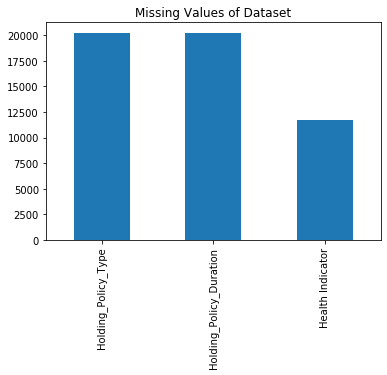

In [31]:
missing_data = data_ins.isnull().sum().sort_values(ascending = False)

missing_data = missing_data[missing_data != 0]

missing_data.plot(kind = 'bar')

plt.title('Missing Values of Dataset')

# Handling NULL values of Dataset & Cleaning Data

In [32]:
clients_NA = ['Holding_Policy_Duration','Holding_Policy_Type']
for column in clients_NA:
    data_ins[column] = data_ins[column].fillna(0)

In [33]:
data_ins['Holding_Policy_Duration'] = data_ins['Holding_Policy_Duration'].fillna(0)

In [34]:
data_ins['Holding_Policy_Type'] = data_ins['Holding_Policy_Type'].fillna(0)

In [35]:
data_ins['Health Indicator'] = data_ins['Health Indicator'].fillna(data_ins['Health Indicator'].mode()[0])

In [36]:
data_ins.rename(columns = {'Is_Spouse':'Married','Health Indicator':'Health_Indicator'}, inplace = True)

In [37]:
data_ins['Holding_Policy_Duration'] = data_ins['Holding_Policy_Duration'].replace('14+',15).astype(float).astype(int)

In [38]:
data_ins['Age'] = (data_ins['Upper_Age'] + data_ins['Lower_Age']) / 2

In [39]:
data_ins.drop(columns =['Upper_Age','Lower_Age'] , inplace = True)

In [40]:
data_ins =  data_ins.round({'Reco_Policy_Cat' : 0, 'Reco_Policy_Premium':2, 'Holding_Policy_Type':0 , 'Region_Code':0})

In [41]:
data_ins['Reco_Policy_Cat'] = data_ins['Reco_Policy_Cat'].astype(int)
data_ins['Holding_Policy_Type'] = data_ins['Holding_Policy_Type'].astype(int)
data_ins['Region_Code'] = data_ins['Region_Code'].astype(int)

# 2.	Check the distribution of the dataset? [ 3 Marks]

C:\Users\nidhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


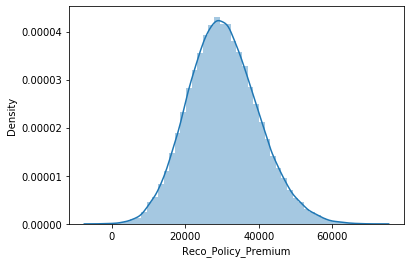

In [43]:
sns.distplot(data_ins.Reco_Policy_Premium)

C:\Users\nidhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


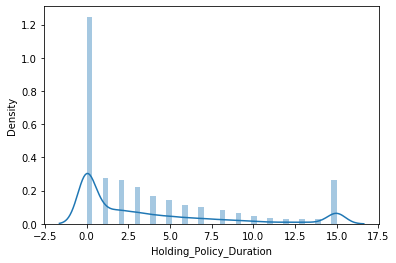

In [44]:
sns.distplot(data_ins.Holding_Policy_Duration)

C:\Users\nidhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


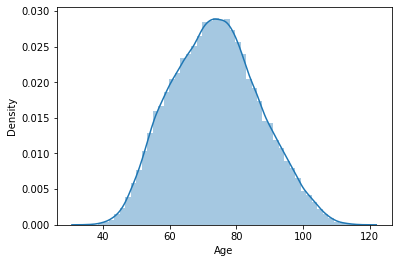

In [45]:
sns.distplot(data_ins.Age)

# 3.	Find the region having the highest customer count? Visualize this by creating a count plot. [ 2 Marks]

In [50]:
data_ins['Region_Code'] = data_ins['Region_Code'].astype(int)
region_labels=[]

for val in data_ins['Region_Code']:
    if 0< val <2000:
        region_labels.append('A')
    elif 2001< val <4000:
        region_labels.append('B') 
    elif 4001< val <6000:
        region_labels.append('C') 
    elif 6001 < val < 8000:
        region_labels.append('D')   
    elif 8001< val <10000:
        region_labels.append('E') 
    else:
        region_labels.append('F')
    
data_ins['Region_Labels'] = region_labels

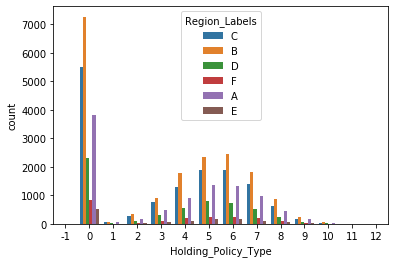

In [53]:
sns.countplot(x='Holding_Policy_Type',hue='Region_Labels',data=data_ins)

Region C has highest customer count

# 4.	Which type of insurance policy is more recommended by the Life Insurance Company. [ 5 Marks]

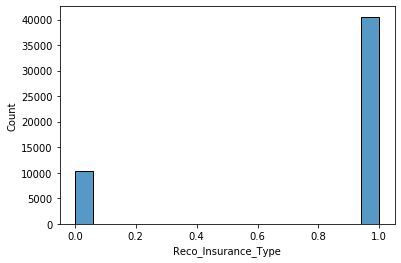

In [254]:
sns.histplot(data_ins, x='Reco_Insurance_Type')

0 is Individual
1 is Joint

Joint Insurance Type is more recommended.

# 5.	Check if there is any linear relationship exist within the dataset. Visualize this by using a correlation matrix. [ 2 Marks]

In [54]:
data_ins.corr()

,Region_Code,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Age
Region_Code,1.000000,-0.005581,-0.007024,-0.005885,0.001808,0.005943,-0.003402
Holding_Policy_Duration,-0.005581,1.000000,-0.000925,-0.004474,-0.004315,0.003436,0.000541
Holding_Policy_Type,-0.007024,-0.000925,1.000000,-0.008548,-0.007999,-0.003166,-0.003846
Reco_Policy_Cat,-0.005885,-0.004474,-0.008548,1.000000,0.005487,0.007107,-0.000899
Reco_Policy_Premium,0.001808,-0.004315,-0.007999,0.005487,1.000000,0.003032,-0.004009
Response,0.005943,0.003436,-0.003166,0.007107,0.003032,1.000000,-0.001819
Age,-0.003402,0.000541,-0.003846,-0.000899,-0.004009,-0.001819,1.000000


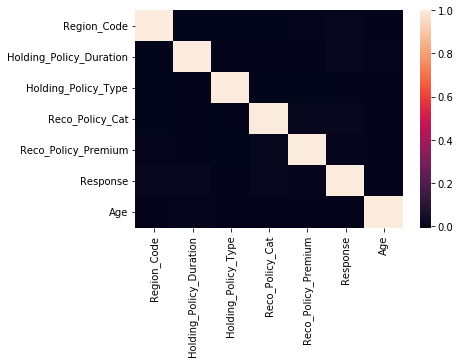

In [55]:
sns.heatmap(data_ins.corr())

# 6.	Check which category of the insurance policy is more recommended. [ 3 Marks]

In [259]:
data_ins['Reco_Policy_Cat']=data_ins['Reco_Policy_Cat'].astype(int)
Cat_Policy=[]
for val in data_ins['Reco_Policy_Cat']:
    if 0 <val< 20:
        Cat_Policy.append('CAT1')
    elif 21 <val< 40:
        Cat_Policy.append('CAT2')
    elif 41 <val< 60:
        Cat_Policy.append('CAT3')      
    else:
        Cat_Policy.append('CAT4')
    
data_ins['Reco_Policy_Category']=Cat_Policy

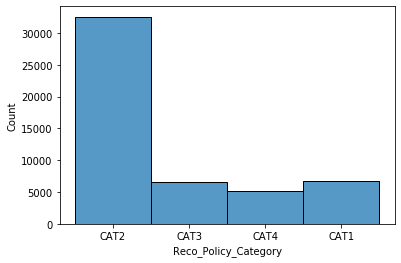

In [260]:
sns.histplot(data_ins, x= 'Reco_Policy_Category')

# 7.	As per accommodation, who are more interested in buying out the insurance policy. [ 2 Marks]

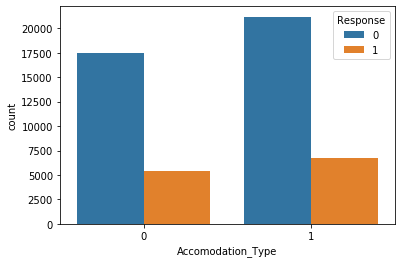

In [261]:
sns.countplot(x = 'Accomodation_Type', hue = 'Response', data = data_ins)

# 8.	Which type of customers are more interested in buying out the policy. Visualize this via count plot. [ 3 Marks]

In [57]:
#Categorizing age in groups
Age_Category=[]
for val in data_ins['Age']:
    if 0 < val < 30:
        Age_Category.append('0_30')
    elif 31 <val< 60:
        Age_Category.append('31_60')
    elif 61 <val< 90:
        Age_Category.append('61_90')
    elif 91 <val< 120:
        Age_Category.append('91_120')
    else:
        Age_Category.append('Range Exceeded')
data_ins['Age_Category']=  Age_Category  

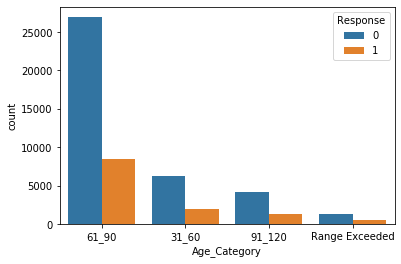

In [58]:
sns.countplot(data =  data_ins, x = 'Age_Category', hue = 'Response')

In [59]:
data_ins['Cust_Type'] = data_ins['Holding_Policy_Duration'].apply(lambda x : 'New' if x == 0 else 'Old')

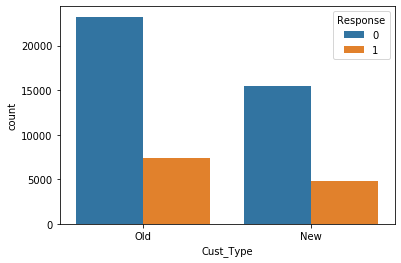

In [60]:
sns.countplot(data =  data_ins, x = 'Cust_Type', hue = 'Response')

# 9.	Are unmarried couples more interested in buying out the insurance policy? Visualize this via count plot. [ 2 Marks]

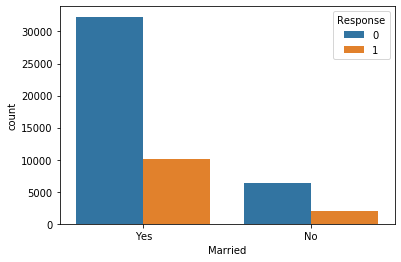

In [63]:
sns.countplot(data = data_ins, x = 'Married', hue = 'Response')

# 10.	Is there any difference in Recommended policy premium in accordance with the types of recommendation? [ 5 Marks]

In [64]:
data_ins['Reco_Policy_Premium'].sort_values()

1325     -4144.44
27520    -2893.36
23123    -2216.63
3348     -1871.29
4151     -1868.42
           ...   
32276    67934.65
37241    67983.69
29213    68636.15
38613    69075.42
12851    72046.90
Name: Reco_Policy_Premium, Length: 50882, dtype: float64

In [65]:
data_ins['Reco_Policy_Premium'] = data_ins['Reco_Policy_Premium'].astype(int)
Premium_labels=[]

for val in data_ins['Reco_Policy_Premium']:
    if 0< val < 5000:
        Premium_labels.append('A')
    elif 5001 < val < 10000:
        Premium_labels.append('B') 
    elif 10001 < val < 15000:
        Premium_labels.append('C') 
    elif 15001 < val < 20000:
        Premium_labels.append('D')   
    elif 20001 < val < 25000:
        Premium_labels.append('E') 
    elif 25001 < val < 30000:
        Premium_labels.append('F') 
    elif 30001 < val < 35000:
        Premium_labels.append('G') 
    elif 35001 < val < 40000:
        Premium_labels.append('H') 
    elif 40001 < val < 45000:
        Premium_labels.append('I')
    elif 45001 < val < 50000:
        Premium_labels.append('J') 
    elif 50001 < val < 55000:
        Premium_labels.append('K')
    elif 55001 < val < 60000:
        Premium_labels.append('L') 
    elif 60001 < val < 65000:
        Premium_labels.append('M')
    elif 65001 < val < 70000:
        Premium_labels.append('N') 
    elif 70001 < val < 75000:
        Premium_labels.append('O')
    else:
        Premium_labels.append('P')
    
data_ins['Premium_labels'] = Premium_labels



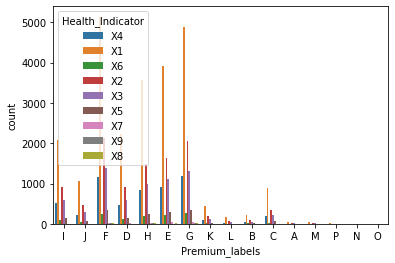

In [66]:
sns.countplot(data = data_ins, x = 'Premium_labels', hue = 'Health_Indicator')

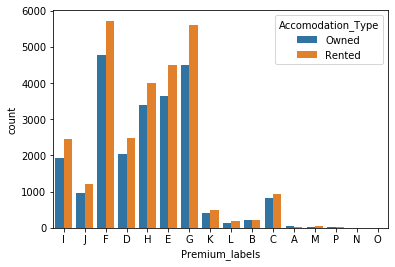

In [67]:
sns.countplot(data = data_ins, x = 'Premium_labels', hue = 'Accomodation_Type')

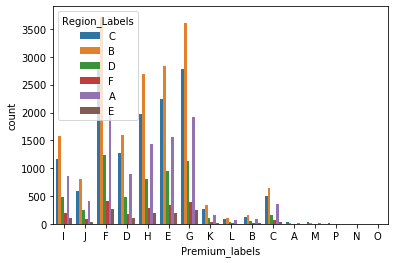

In [68]:
sns.countplot(data = data_ins, x = 'Premium_labels', hue = 'Region_Labels')

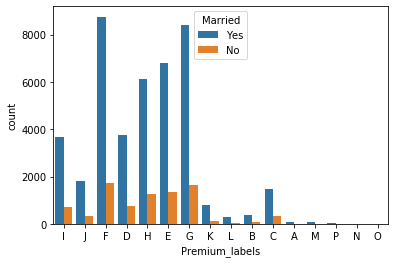

In [72]:
sns.countplot(data = data_ins, x = 'Premium_labels', hue = 'Married')

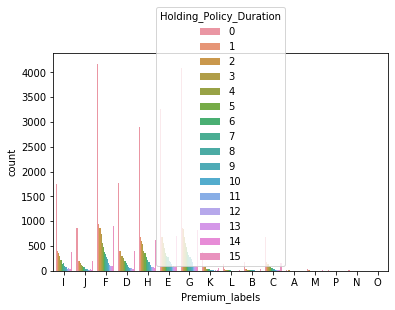

In [73]:
sns.countplot(data = data_ins, x = 'Premium_labels', hue = 'Holding_Policy_Duration')

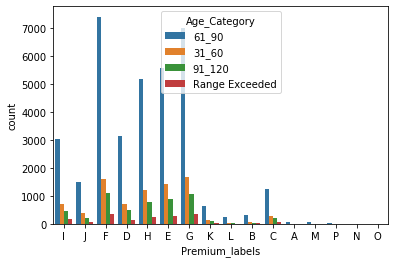

In [74]:
sns.countplot(data = data_ins, x = 'Premium_labels', hue = 'Age_Category')